**Intensity tranformation implementation**

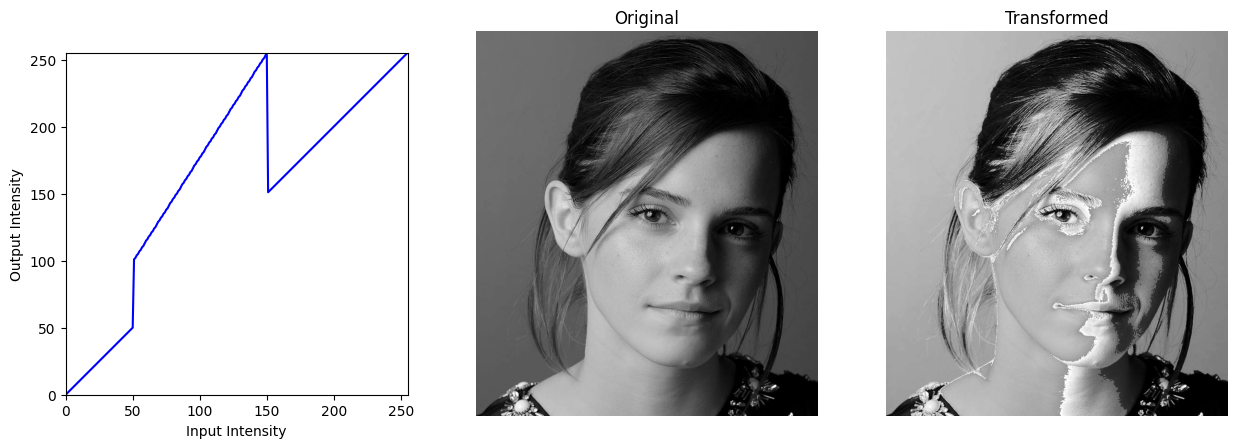

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255) ,(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1] + 1, 255, 255-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

im1 = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert im1 is not None

fig, ax = plt.subplots(1, 3, figsize=(15,5) )
ax[0].plot(transform, 'b', label='Transformation')
ax[0].set_xlabel(r'Input Intensity')
ax[0].set_ylabel('Output Intensity')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].imshow(im1, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(transform[im1], cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

**Brain photon density image intensity transformation**

*    To accentuate white or gray areas in a dark regions of an image negative intensity transformation is used.

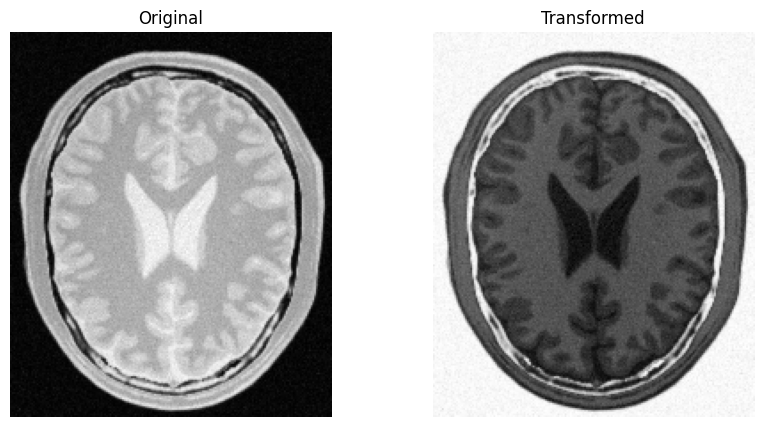

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im2 = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert im2 is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
g = cv.LUT(im2, t)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(im2, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(t[im2], cmap='gray')
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

**Applying Gamma correction**

*    L plane refers to the lightness plane of the image (black to white).
*    When we are applying gamma correction to the L plane of the image it will only affect to the brightness of the image (without changing the colour)


*    In the given image we can observe that the details in the dark areas can not be clearly seen, so we need to enhance this dark areas in the input image.
*    Here, we need to map the low intensity values into a higher range to enhance the details in dark areas, so we will use a gamma value which is less than 1.

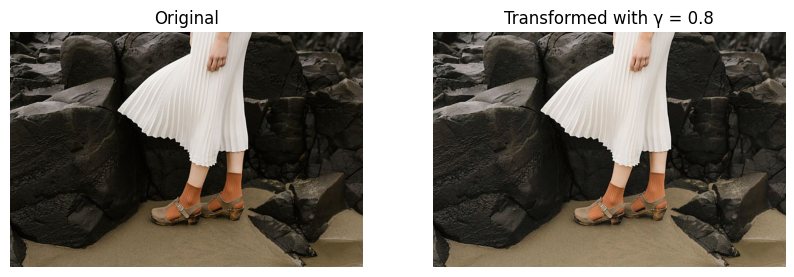

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


im3 = cv2.imread('D:/semester 5/Intensity transformation and neighbourhood filtering/a1images/a1images/highlights_and_shadows.jpg')
assert im3 is not None

# Convert the image from BGR to L*a*b* color space
lab_image = cv2.cvtColor(im3, cv2.COLOR_BGR2LAB)

# Split the L, a, and b channels
L, a, b = cv2.split(lab_image)

# Define gamma 
gamma = 0.8
t = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)], dtype=np.uint8)
corrected_L = cv2.LUT(L, t)

# Merge the corrected L plane back with a and b channels
corrected_lab_image = cv2.merge((corrected_L, a, b))

# Convert the corrected image back to BGR color space
corrected_image = cv2.cvtColor(corrected_lab_image, cv2.COLOR_LAB2BGR)

# Display the original and gamma corrected images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Gamma corrected image
ax[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f'Transformed with γ = {gamma}')
ax[1].axis('off')

plt.show()


**Histograms of the above images**

In [5]:
#####Histogram comparison#########


# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming im3 is the original image and corrected_image is the gamma corrected image
# color = ('b', 'g', 'r')
# plt.figure(figsize=(10, 5))  # Create a larger figure for better visualization

# for i, c in enumerate(color):
#     # Calculate histogram for the original image
#     hist1 = cv.calcHist([im3], [i], None, [256], [0, 256])
#     # Calculate histogram for the gamma corrected image
#     hist2 = cv.calcHist([corrected_image], [i], None, [256], [0, 256])

#     # Plot the original image histogram
#     plt.plot(hist1, color=c, linestyle='-', label=f'Original {c.upper()}')
#     # Plot the gamma corrected image histogram
#     plt.plot(hist2, color=c, linestyle='--', label=f'Corrected {c.upper()}')

# # Add labels and legends for clarity
# plt.xlim([0, 256])
# plt.title("Histogram Comparison (Original vs Gamma Corrected)")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")
# plt.legend(loc="upper right")

# # Display the plot
# plt.show()


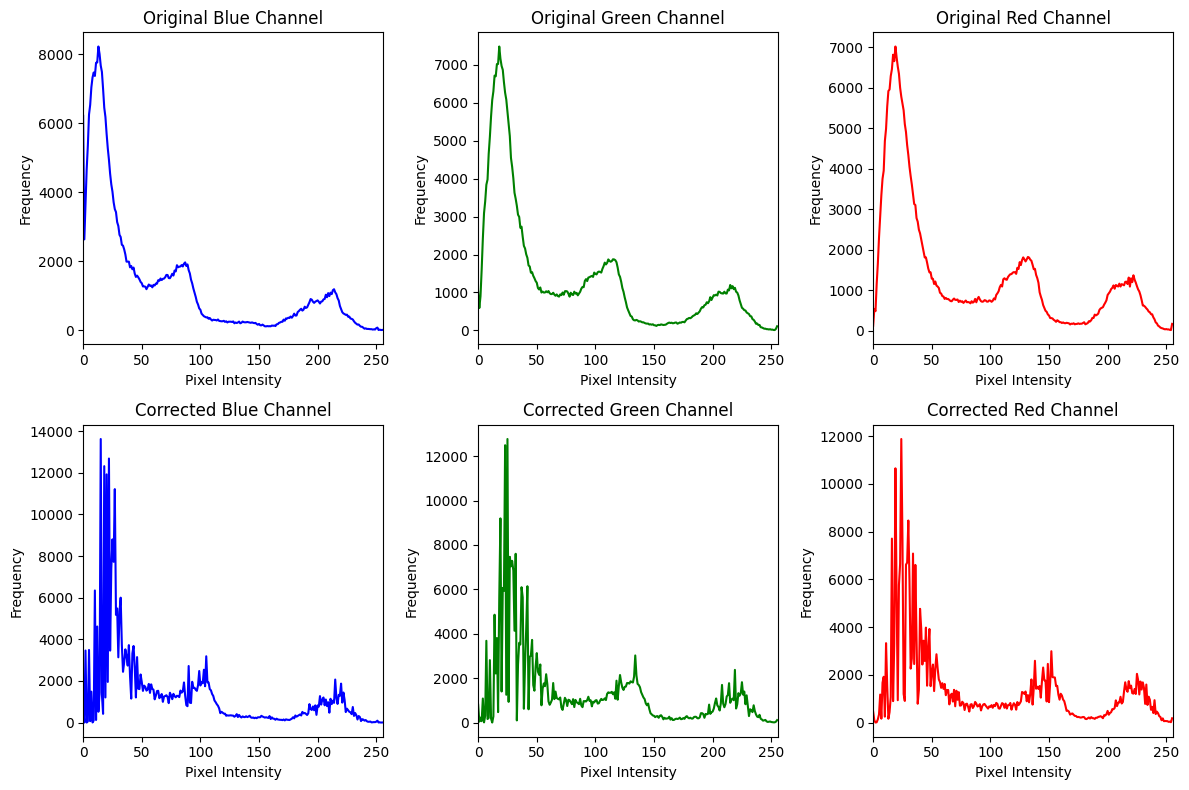

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming im3 is the original image and corrected_image is the gamma-corrected image
color = ('b', 'g', 'r')
color_name = {'b': 'Blue', 'g': 'Green', 'r': 'Red'}

plt.figure(figsize=(12, 8))  # Create a larger figure for better visualization

# Loop through each color channel (B, G, R)
for i, c in enumerate(color):
    # Calculate histogram for the original image
    hist1 = cv.calcHist([im3], [i], None, [256], [0, 256])
    # Calculate histogram for the gamma-corrected image
    hist2 = cv.calcHist([corrected_image], [i], None, [256], [0, 256])

    # Create a subplot for the original image histogram
    plt.subplot(2, 3, i + 1)
    plt.plot(hist1, color=c)
    plt.title(f'Original {color_name[c]} Channel')
    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Create a subplot for the gamma-corrected image histogram
    plt.subplot(2, 3, i + 4)
    plt.plot(hist2, color=c)
    plt.title(f'Corrected {color_name[c]} Channel')
    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


*    By observing these histograms we can clearly see that the corrected image has higher low intensity pixels compared to the original image. That implies that the low intensity values of the original image has mapped into a higher range of pixel in the gamma corrected image.

*    Also the gamma corrected histograms have slightly skewed to the left.

**Increasing the vibrance of a photograph**

Seperating into hue , saturation and value planes.

*    Hue:This represents the color type and is the angle in the color wheel.
*    Saturation:This measures the intensity or purity of the color.
*    Value (sometimes called Brightness):This represents the brightness or lightness of the color.

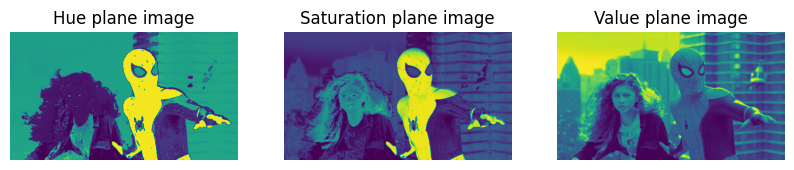

In [7]:
import cv2 as cv

# Read the image
image = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\spider.png')
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual channels
hue_plane, saturation_plane, value_plane = cv2.split(hsv_image)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

#Hue plane image
ax[0].imshow(hue_plane)
ax[0].set_title('Hue plane image')
ax[0].axis('off')

#Saturation plane image
ax[1].imshow(saturation_plane)
ax[1].set_title('Saturation plane image')
ax[1].axis('off')

#Value plane image
ax[2].imshow(value_plane)
ax[2].set_title('Value plane image')
ax[2].axis('off')
plt.show()

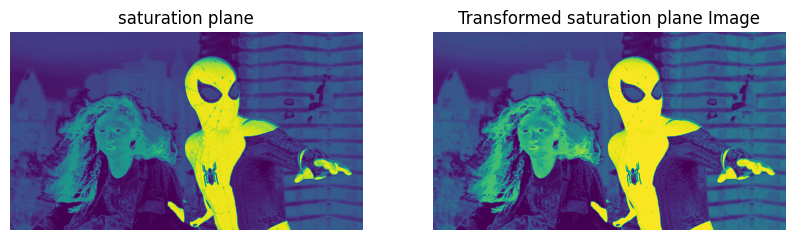

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

a = 0.7
sigma = 70

f_x = np.array([min(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)),255) for x in range(256)], dtype=np.uint8)
transformedImage = cv.LUT(saturation_plane,f_x)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(saturation_plane)
ax[0].set_title('saturation plane')
ax[0].axis('off')
ax[1].imshow(transformedImage)
ax[1].set_title('Transformed saturation plane Image')
ax[1].axis('off')

plt.show()

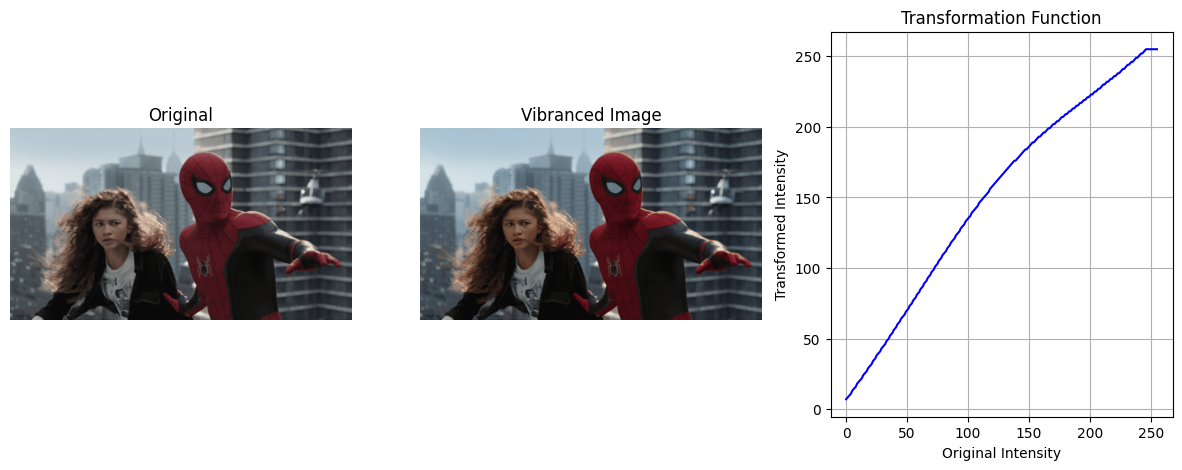

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv.imread(r'D:\semester 5\Intensity transformation and neighbourhood filtering\a1images\a1images\spider.png')

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual channels
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

# Define the intensity transformation function
a = 0.3
sigma = 70
x_values = np.arange(256)

f_x = np.array([min(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255) for x in range(256)], dtype=np.uint8)

# Apply the transformation to the saturation plane
transformedImage = cv.LUT(saturation_plane, f_x)

# Merge the transformed saturation plane back with the original hue and value planes
vibrancedImage = cv.merge((hue_plane, transformedImage, value_plane))

# Convert the HSV image back to BGR for visualization
vibrancedImage_BGR = cv.cvtColor(vibrancedImage, cv.COLOR_HSV2BGR)

# Plot the images and transformation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original image
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Vibranced image
ax[1].imshow(cv.cvtColor(vibrancedImage_BGR, cv.COLOR_BGR2RGB))
ax[1].set_title('Vibranced Image')
ax[1].axis('off')

# Transformation function plot
ax[2].plot(x_values, f_x, linestyle='-', color='b')
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Original Intensity')
ax[2].set_ylabel('Transformed Intensity')
ax[2].grid(True)
ax[2].axis('on')
plt.show()


**Histogram Equalization**

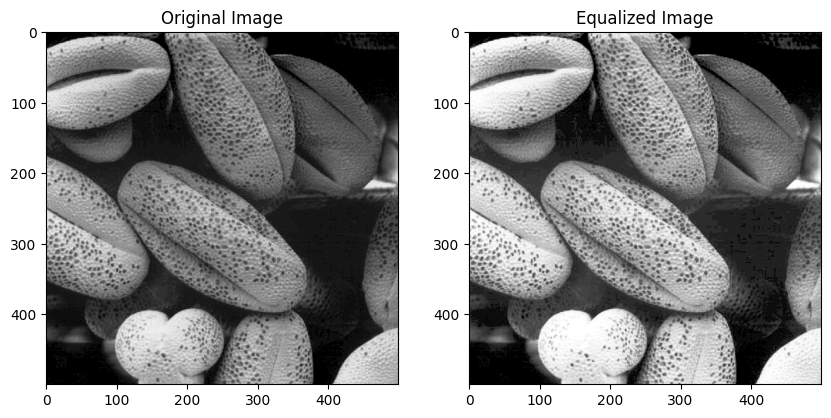

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\shells.tif', cv2.IMREAD_GRAYSCALE)

# Get the image dimensions
rows, cols = image.shape

# Compute the histogram
histogram = np.zeros(256, dtype=int)
for i in range(rows):
    for j in range(cols):
        histogram[image[i, j]] += 1

# Normalize the histogram (i.e., get the probability distribution)
histogram_normalized = histogram / (rows * cols)

# Compute the cumulative distribution function (CDF)
cdf = np.zeros(256)
cdf[0] = histogram_normalized[0]
for i in range(1, 256):
    cdf[i] = cdf[i - 1] + histogram_normalized[i]

# Normalize the CDF to map it to the range [0, 255]
cdf_normalized = np.round(cdf * 255).astype(int)

# Create the equalized image using the CDF mapping
equalized_image = np.zeros_like(image)
for i in range(rows):
    for j in range(cols):
        equalized_image[i, j] = cdf_normalized[image[i, j]]

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.show()



**Applying histogram equalization into foreground of an image**

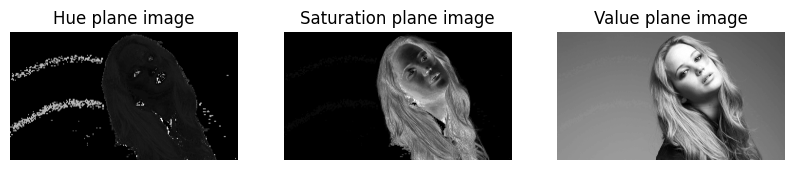

In [11]:
import cv2 as cv

# Read the image
image = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\jeniffer.jpg' )
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual channels
hue_plane, saturation_plane, value_plane = cv2.split(hsv_image)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

#Hue plane image
ax[0].imshow(hue_plane ,cmap='gray')
ax[0].set_title('Hue plane image')
ax[0].axis('off')

#Saturation plane image
ax[1].imshow(saturation_plane ,cmap='gray')
ax[1].set_title('Saturation plane image')
ax[1].axis('off')

#Value plane image
ax[2].imshow(value_plane ,cmap='gray')
ax[2].set_title('Value plane image')
ax[2].axis('off')
plt.show()

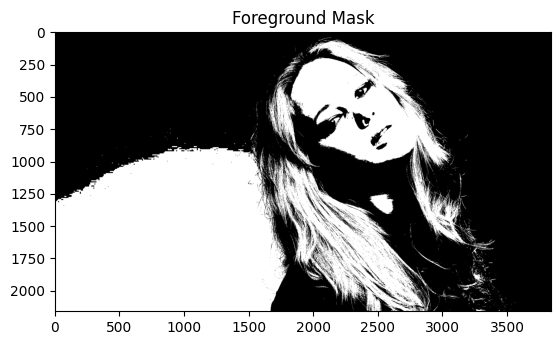

In [12]:
# Apply a threshold to the value plane to create a foreground mask
_, mask = cv2.threshold(value_plane, 128, 255, cv2.THRESH_BINARY)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()


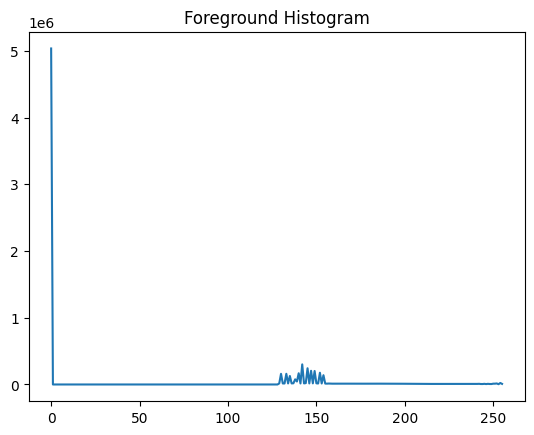

In [13]:
# Extract the foreground using the mask
foreground = cv2.bitwise_and(value_plane, value_plane, mask=mask)

# Compute the histogram of the foreground
histogram = cv2.calcHist([foreground], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram)
plt.title('Foreground Histogram')
plt.show()


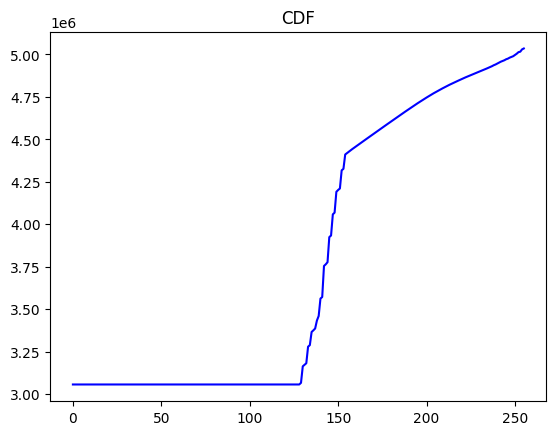

In [14]:
import numpy as np

# Compute the cumulative sum of the histogram
cdf = np.cumsum(histogram)

# Normalize the CDF
cdf_normalized = cdf * histogram.max() / cdf.max()

# Plot the CDF
plt.plot(cdf_normalized, color='b')
plt.title('CDF')
plt.show()


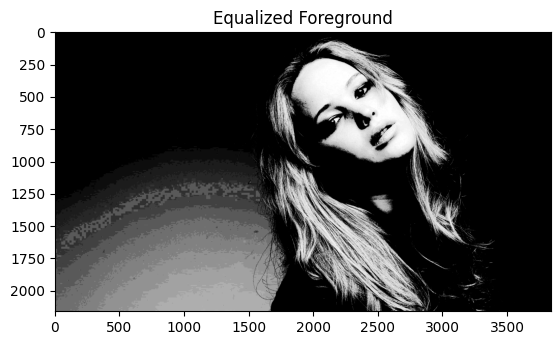

In [15]:
# Create a lookup table to map old pixel values to new ones based on the CDF
cdf_min = cdf[cdf > 0][0]  # The minimum non-zero value of the CDF
equalized_foreground = np.zeros_like(foreground)

# Apply histogram equalization
for i in range(256):
    equalized_foreground[foreground == i] = (cdf[i] - cdf_min) * 255 / (cdf[-1] - cdf_min)

# Display the equalized foreground
plt.imshow(equalized_foreground, cmap='gray')
plt.title('Equalized Foreground')
plt.show()


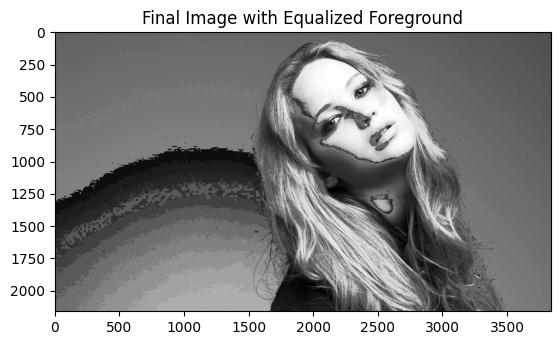

In [16]:
# Extract the background
background_mask = cv2.bitwise_not(mask)
background = cv2.bitwise_and(value_plane, value_plane, mask=background_mask)

# Combine the equalized foreground and the original background
final_image = cv2.add(equalized_foreground, background)

# Display the final image
plt.imshow(final_image, cmap='gray')
plt.title('Final Image with Equalized Foreground')
plt.show()


Sobel filtering

In [25]:
# Using the existing filter2D to Sobel filter the image

albert_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\einstein.png", cv2.IMREAD_GRAYSCALE)
albert_img.shape


(380, 364)

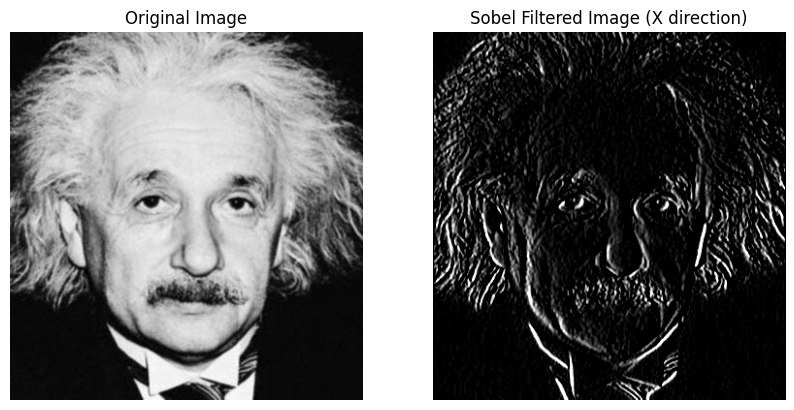

In [18]:
# Define a Sobel filter kernel (for detecting edges in x direction)
sobel_kernel_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

# Apply the Sobel filter using filter2D function
sobel_x = cv2.filter2D(albert_img, -1, sobel_kernel_x)

# Display the original image and the Sobel filtered image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Filtered Image (X direction)')
plt.axis('off')

plt.show()


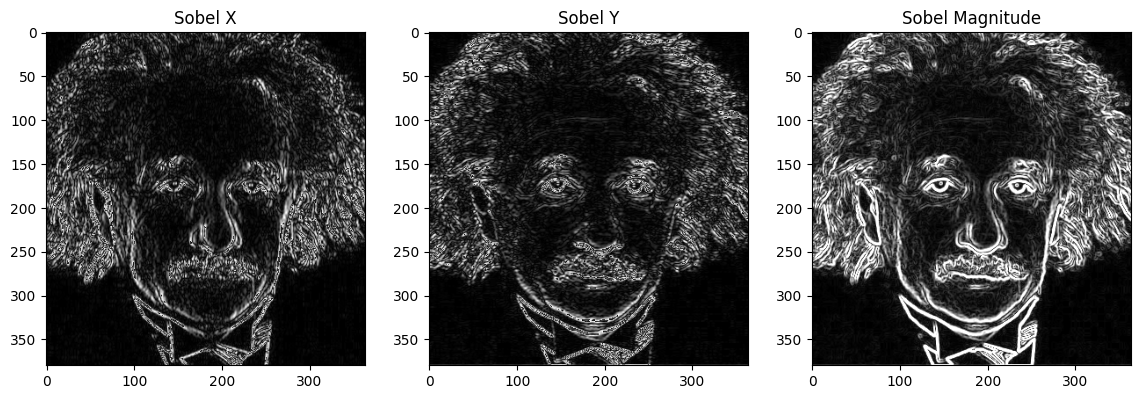

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [26]:

# Get image dimensions
height, width = albert_img.shape

# Define Sobel kernels
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

sobel_kernel_y = np.array([[1, 2, 1],
                           [ 0,  0,  0],
                           [ -1, -2,  -1]])

# Initialize empty arrays to store results
sobel_x = np.zeros_like(albert_img, dtype=np.float64)
sobel_y = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Perform convolution with the Sobel kernel manually
for i in range(1, height+1):
    for j in range(1, width+1):
        # Extract the 3x3 region from the padded image
        region = padded_img[i-1:i+2, j-1:j+2]
        
        # Apply the Sobel kernels
        gx = np.sum(sobel_kernel_x * region)
        gy = np.sum(sobel_kernel_y * region)
        
        # Store the result in the output arrays
        sobel_x[i-1, j-1] = gx
        sobel_y[i-1, j-1] = gy

# Combine the horizontal and vertical Sobel results to get the gradient magnitude
sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitude = np.clip(sobel_magnitude, 0, 255)  # Clip values to valid range

# Convert the result back to uint8 format
sobel_x = np.uint8(np.abs(sobel_x))
sobel_y = np.uint8(np.abs(sobel_y))
sobel_magnitude = np.uint8(sobel_magnitude)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')

plt.show()

print(sobel_kernel_x)


In [27]:
# Define Sobel X kernel (horizontal edge detection)
sobel_kernel_x = np.array([[1, 0, -1],
                           [2, 0, -2],
                           [1, 0, -1]])

# Initialize an empty array to store the Sobel X result
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges
padded_img = np.pad(albert_img, ((1, 1), (1, 1)), mode='constant')

# Perform convolution with the Sobel X kernel manually
for i in range(1, height+1):
    for j in range(1, width+1):
        # Extract the 3x3 region from the padded image
        region = padded_img[i-1:i+2, j-1:j+2]
        
        # Apply the Sobel X kernel
        gx = np.sum(sobel_kernel_x * region)
        
        # Store the result in the Sobel X output array
        sobel_x[i-1, j-1] = gx

# Convert the result back to uint8 format and normalize the values to 0-255
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))

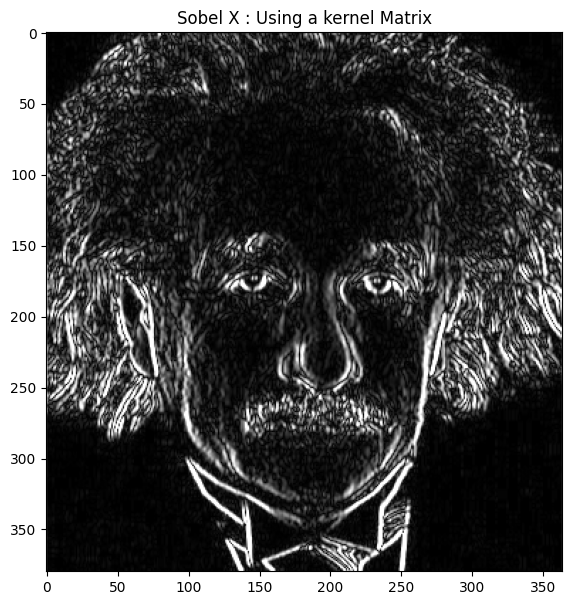

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [28]:
# Plotting the results
plt.figure(figsize=(7, 7))

plt.subplot(1, 1, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X : Using a kernel Matrix')

plt.show()

print(sobel_kernel_x)

In [29]:
# Define the 1D Sobel kernels (separable)
sobel_kernel_v = np.array([1, 2, 1])  # Vertical 1D kernel (for smoothing)
sobel_kernel_h = np.array([1, 0, -1])  # Horizontal 1D kernel (for edge detection)

# Initialize empty arrays to store intermediate and final results
sobel_x_intermediate = np.zeros_like(albert_img, dtype=np.float64)
sobel_x = np.zeros_like(albert_img, dtype=np.float64)

# Padding the image to handle the edges (for 1D vertical filter)
padded_img = np.pad(albert_img, ((1, 1), (0, 0)), mode='constant')

# Step 1: Apply vertical 1D kernel (along the rows)
for i in range(1, height+1):
    for j in range(0, width):
        # Apply the vertical kernel to the 3-pixel neighborhood in the column
        sobel_x_intermediate[i-1, j] = np.sum(padded_img[i-1:i+2, j] * sobel_kernel_v)

# Padding the intermediate result for horizontal filtering
padded_intermediate = np.pad(sobel_x_intermediate, ((0, 0), (1, 1)), mode='constant')

# Step 2: Apply horizontal 1D kernel (along the columns)
for i in range(0, height):
    for j in range(1, width+1):
        # Apply the horizontal kernel to the 3-pixel neighborhood in the row
        sobel_x[i, j-1] = np.sum(padded_intermediate[i, j-1:j+2] * sobel_kernel_h)

# Convert the result back to uint8 format, normalizing the values to 0-255
sobel_x = np.uint8(np.clip(np.abs(sobel_x), 0, 255))

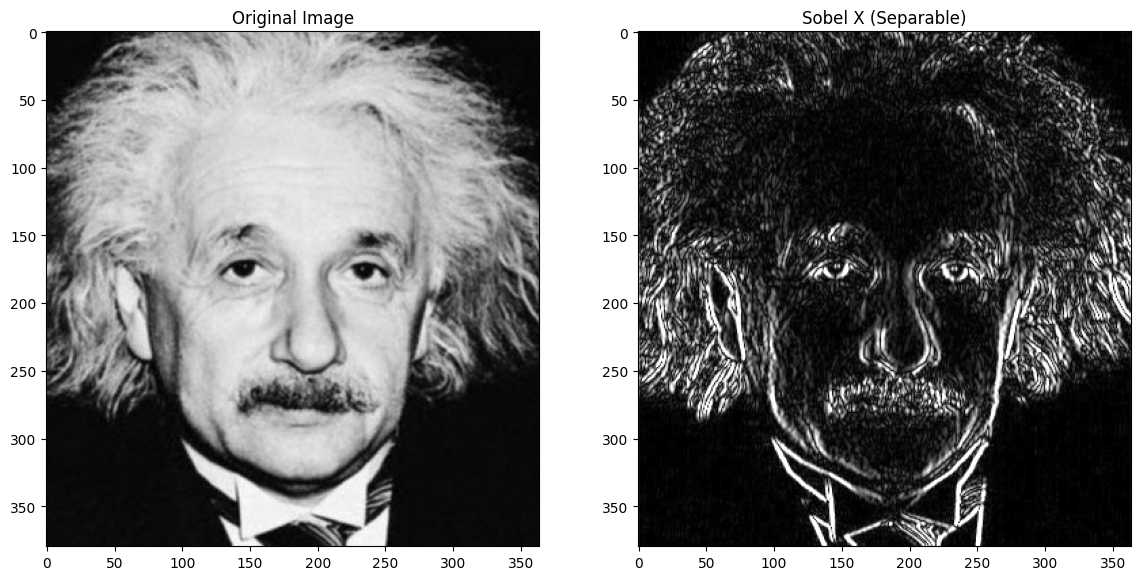

In [30]:

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(albert_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X (Separable)')

plt.show()


zoom images using interpolation techniques

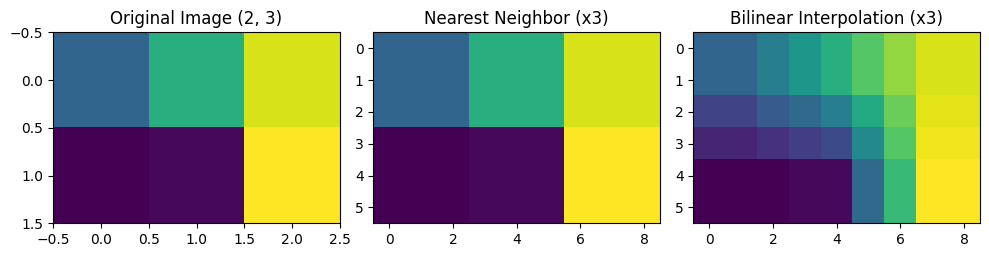

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Original image (2x3 grayscale)
test_img = np.array([[30, 45, 60], [14, 15, 63]], dtype=np.uint8)

# Define the scale factor for zooming
scale_factor = 3

# Compute the new size (width * scale_factor, height * scale_factor)
new_size = (test_img.shape[1] * scale_factor, test_img.shape[0] * scale_factor)

# Resize the image using nearest neighbor interpolation
zoomed_test_img_nn = cv2.resize(test_img, new_size, interpolation=cv2.INTER_NEAREST)

# Resize the image using bilinear interpolation
zoomed_test_img_bilinear = cv2.resize(test_img, new_size, interpolation=cv2.INTER_LINEAR)

# Plot the original and resized images
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 3, 1)
plt.title(f'Original Image {test_img.shape}')
plt.imshow(test_img)
plt.axis('on')

# Display the nearest neighbor resized image
plt.subplot(1, 3, 2)
plt.title(f'Nearest Neighbor (x{scale_factor})')
plt.imshow(zoomed_test_img_nn)
plt.axis('on')

# Display the bilinear resized image
plt.subplot(1, 3, 3)
plt.title(f'Bilinear Interpolation (x{scale_factor})')
plt.imshow(zoomed_test_img_bilinear)
plt.axis('on')

# Show the plots
plt.tight_layout()
plt.show()


In [32]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to zoom the image
def zoom_image(image, scale, interpolation):
    height, width = image.shape[:2]
    new_size = (int(width * scale), int(height * scale))
    return cv2.resize(image, new_size, interpolation=interpolation)

# Function to compute normalized SSD between two images
def compute_normalized_ssd(img1, img2, bypass_size_error=True):
    if not bypass_size_error:
        # Ensure images are of the same size
        assert img1.shape == img2.shape, "Images must be the same shape for SSD computation."
    else: 
        # Crop the larger image to match the smaller image
        min_height = min(img1.shape[0], img2.shape[0])
        min_width = min(img1.shape[1], img2.shape[1])

        img1 = img1[:min_height, :min_width]
        img2 = img2[:min_height, :min_width]

    
    
    # Compute the sum of squared differences
    ssd = np.sum((img1.astype("float32") - img2.astype("float32")) ** 2)
    
    # Normalize by the number of pixels
    norm_ssd = ssd / np.prod(img1.shape)
    
    return norm_ssd

# Function to display images side-by-side
def display_images(original, nearest, bilinear, titles):
    plt.figure(figsize=(15, 15))

    # Original image
    plt.subplot(3, 1, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(titles[0])
    plt.axis('off')

    # Nearest-neighbor zoomed image
    plt.subplot(3, 1, 2)
    plt.imshow(cv2.cvtColor(nearest, cv2.COLOR_BGR2RGB))
    plt.title(titles[1])
    plt.axis('off')

    # Bilinear zoomed image
    plt.subplot(3,1, 3)
    plt.imshow(cv2.cvtColor(bilinear, cv2.COLOR_BGR2RGB))
    plt.title(titles[2])
    plt.axis('off')

    plt.show()


def get_zoom_and_orignal_img(small_img, big_img, scale_factor=4, bypass_size_error=True):
        # Scale factor
    scale_factor = 4

    # Zoom using nearest-neighbor interpolation
    zoomed_nn = zoom_image(small_img, scale_factor, cv2.INTER_NEAREST)

    # Zoom using bilinear interpolation
    zoomed_bilinear = zoom_image(small_img, scale_factor, cv2.INTER_LINEAR)

    # Compute normalized SSD for nearest-neighbor zoomed image
    ssd_nn = compute_normalized_ssd(big_img, zoomed_nn, bypass_size_error=bypass_size_error)

    # Compute normalized SSD for bilinear zoomed image
    ssd_bilinear = compute_normalized_ssd(big_img, zoomed_bilinear, bypass_size_error=bypass_size_error)

    # Print out SSD values
    print(f"Normalized SSD (Nearest Neighbor): {ssd_nn}")
    print(f"Normalized SSD (Bilinear): {ssd_bilinear}")

    # Display the images
    titles = ["Original Image", f"Nearest Neighbor Zoomed, ssd={ssd_nn}", f"Bilinear Zoomed, ssd={ssd_bilinear}"]
    display_images(big_img, zoomed_nn, zoomed_bilinear, titles)


In [37]:
im01_small_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im01small.png")
im01_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im01.png")

im02_small_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im02small.png")
im02_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im02.png")

im03_small_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im03small.png")
im03_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\im03.png")

taylor_very_small_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\\taylor_very_small.jpg")
taylor_small_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\\taylor_small.jpg")
taylor_img = cv2.imread("D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\a1q5images\\taylor.jpg")

Normalized SSD (Nearest Neighbor): 136.2690534979424
Normalized SSD (Bilinear): 115.09185185185186


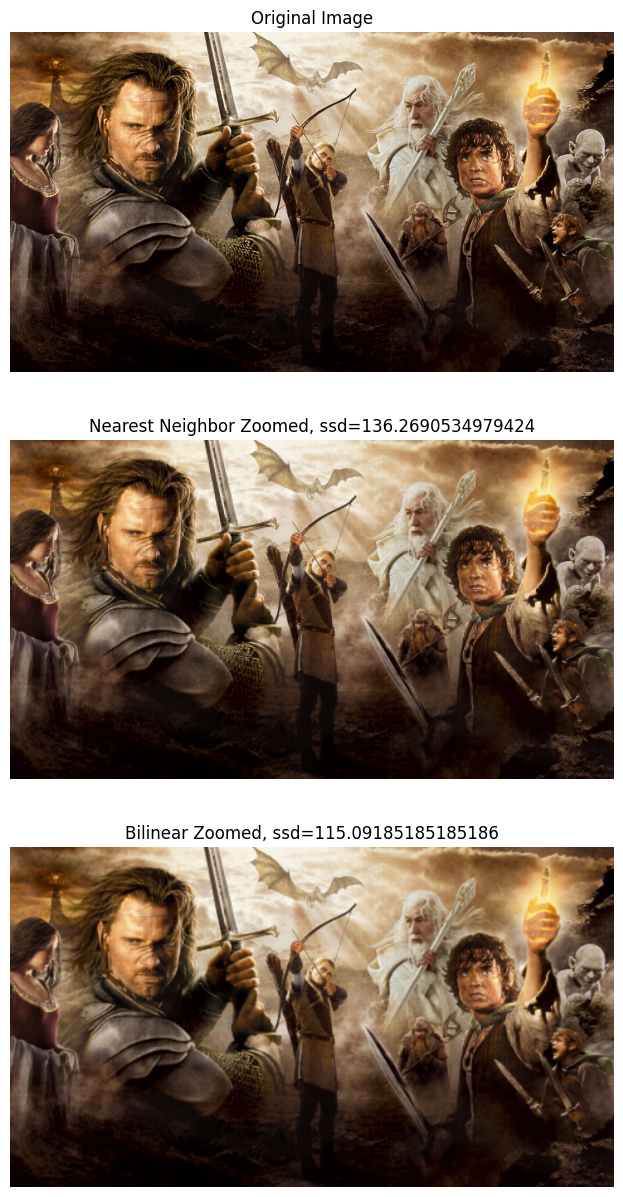

In [36]:
get_zoom_and_orignal_img(small_img=im01_small_img, big_img=im01_img, scale_factor=4, bypass_size_error=False)

Normalized SSD (Nearest Neighbor): 26.446071759259258
Normalized SSD (Bilinear): 18.34591087962963


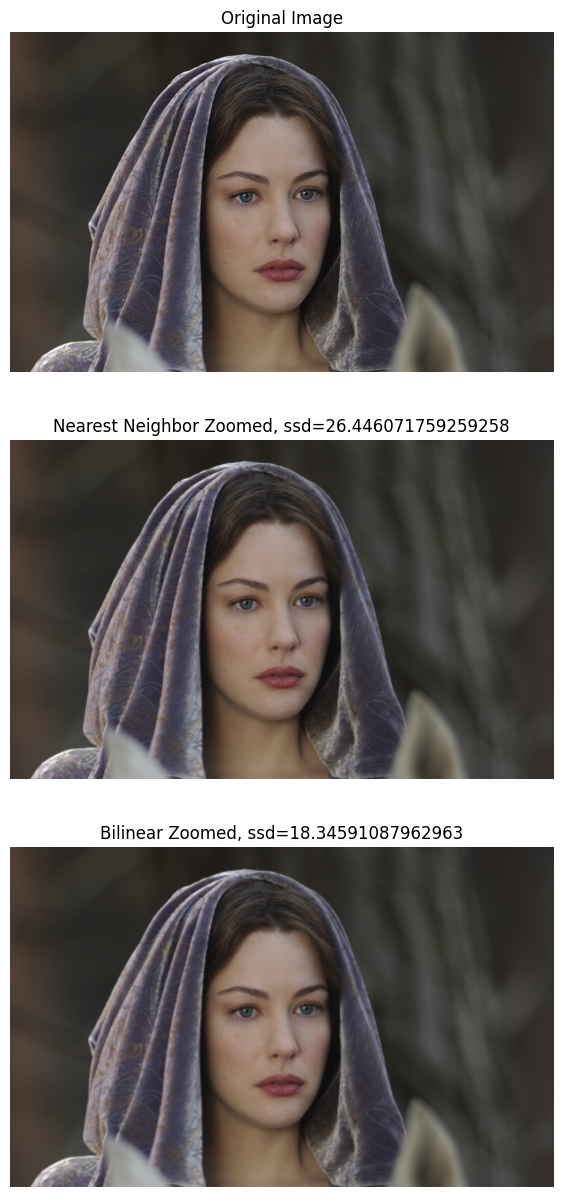

In [38]:
get_zoom_and_orignal_img(small_img=im02_small_img, big_img=im02_img, scale_factor=4, bypass_size_error=False)

In [39]:
im03_small_img.shape
im03_small_img.shape[0]*4, im03_small_img.shape[1]*4
im03_img.shape

(1459, 2400, 3)

Normalized SSD (Nearest Neighbor): 67.58167390145458
Normalized SSD (Bilinear): 51.20135861701318


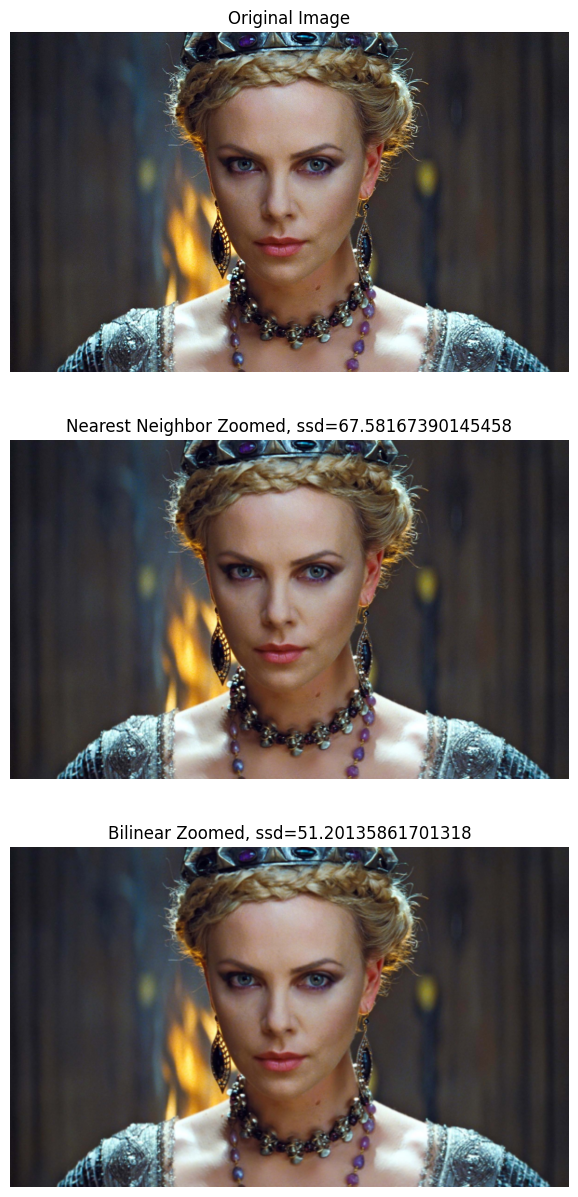

In [40]:
get_zoom_and_orignal_img(small_img=im03_small_img, big_img=im03_img, scale_factor=4, bypass_size_error=True)